<a href="https://colab.research.google.com/github/VineethaThumalapalli/Bike_Prices_Prediction/blob/main/Bike_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bike Price Prediction


---



#Import Library

In [3]:
import pandas as pd

In [1]:
import numpy as np

#Import Data


In [4]:
df= pd.read_csv('/content/bike price.csv')

In [5]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


#Remove Missing Values

In [7]:
df=df.dropna()

In [8]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


In [9]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [10]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [11]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [12]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

In [13]:
df[['Seller_Type']].value_counts()

Seller_Type
0              623
1                3
dtype: int64

In [14]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

In [15]:
df.replace({'Owner':{'1st owner':0, '2nd owner':1, '3rd owner':2, '4th owner':3}},inplace=True) 

In [16]:
df[['Owner']].value_counts()

Owner
0        556
1         66
2          3
3          1
dtype: int64

#Define Target Variable (y) and Feature Variables (X

In [17]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [18]:
df.shape

(626, 8)

In [19]:
y = df['Selling_Price']

In [20]:
y.shape

(626,)

In [21]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [22]:
X=df[['Year','Seller_Type','Owner','KM_Driven','Ex_Showroom_Price']]

In [23]:
X.shape

(626, 5)

In [24]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


#Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=222529)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((438, 5), (188, 5), (438,), (188,))

#Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X_train, y_train)

LinearRegression()

#Predict test Data

In [31]:
y_pred= lr.predict(X_test)

In [32]:
y_pred.shape

(188,)

In [33]:
y_pred

array([ 48300.87901493, 249715.68108488,  58349.6566714 ,  97788.71878636,
        51990.63301359,  77580.26804251,  39070.44318273,  39826.66492042,
         8697.55279658,  23792.49564438,  25443.28359472,  41961.2053715 ,
        49431.39562849,  21497.100376  ,  52611.11406141, 109718.70607226,
        29731.00267168,  26191.65943038,  65247.69791857, 104444.34345592,
        48660.00438742,  81979.50915417,  50623.87432681,  23261.46491326,
        44588.39753967,  66904.75508552,  25224.79118072,  60681.15866333,
        45614.01907867,  35231.55793204,  54025.77165085,  42039.18461029,
        31220.26545097,  49076.70594472,  40360.64817072,  63307.85927302,
        83790.22708239,  32714.30264615,  62662.91604942,  21372.35769796,
        21653.05885359,   7352.03866637,  35640.13764676,  94402.58859043,
        58693.79747419,  38139.63057597, 117795.14692167,  60437.29180886,
        14329.95831198,  64647.57377108,  16154.24699168,  19567.81363037,
        21294.37845917,  

#Model Accuracy

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
mean_squared_error(y_test,y_pred)

301699446.6154917

In [36]:
mean_absolute_error(y_test,y_pred)

10993.808755695949

In [38]:
r2_score(y_test, y_pred)

-0.617039042945273

#Prediction

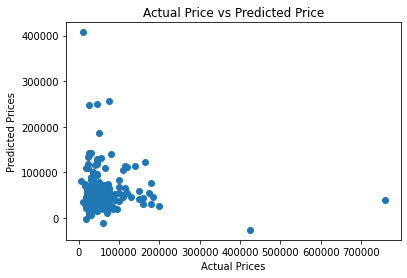

In [39]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

#Future Prediction

In [40]:
df_new =df .sample(1)
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
110,Honda,Honda CB Twister,18000,2010,0,0,60000,53857.0


In [41]:
df_new.shape

(1, 8)

In [42]:
X_new = df_new.drop(['Brand', 'Model','Selling_Price'], axis =1)
y_pred_new = lr.predict(X_new)
y_pred_new

array([14374.17549104])